# Word2Vec
There is a great tutorial on github https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469

## 1. A simple example
We use static values in a 2d space. The first component stands for the cuteness and the second component stands for the size of an animal.

![animals](http://static.decontextualize.com/snaps/animal-space.png)

In [10]:
# represents an animal as a 2d vector
class Animal:
    def __init__(self, x, y):
        self.x = x
        self.y = y


# define some animals
kitten = Animal(95, 15)
hamster = Animal(80, 8)
tarantula = Animal(8, 3)
chicken = Animal(25, 15)
elephant = Animal(65, 90)

In [29]:
import math

# calculates the distance between two animals in the 2d space
# takes to animal objects
def distance2d(a, b):
    return math.sqrt((a.x - b.x)**2 + (a.y - b.y)**2)

# subtracts two animals and returns a vector represented as an animal
def sub(a, b):
    return Animal(a.x - b.x, a.y - b.y)

# normalizes a vector represented as an animal
def norm(v):
    d = math.sqrt(v.x**2 + v.y**2)
    return (v.x / d, v.y / d)

In [30]:
print("the distance between kitten and elephant is",distance2d(kitten, elephant))

the distance between kitten and elephant is 80.77747210701756


In [31]:
print("tarantual to hamster", distance2d(tarantula, hamster))
print("chicken to kitten", distance2d(chicken, kitten))
print("are almost the same\n")

sub1 = sub(hamster, tarantula)
sub2 = sub(kitten, chicken)
print("norm(hamster to tarantula)",norm(sub1))
print("norm(kitten to chicken)   ",norm(sub2))

tarantual to hamster 72.17340230306452
chicken to kitten 70.0
are almost the same

norm(hamster to tarantula) (0.9975974209676802, 0.06927759867831113)
norm(kitten to chicken)    (1.0, 0.0)


## 2. Example with color names
Color names from [github](https://github.com/dariusk/corpora/blob/master/data/colors/xkcd.json)

In [3]:
import json

# loads color names from an external json file
color_data = json.loads(open("colors.json").read())

print(color_data)

{'description': 'The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey.', 'colors': [{'color': 'cloudy blue', 'hex': '#acc2d9'}, {'color': 'dark pastel green', 'hex': '#56ae57'}, {'color': 'dust', 'hex': '#b2996e'}, {'color': 'electric lime', 'hex': '#a8ff04'}, {'color': 'fresh green', 'hex': '#69d84f'}, {'color': 'light eggplant', 'hex': '#894585'}, {'color': 'nasty green', 'hex': '#70b23f'}, {'color': 'really light blue', 'hex': '#d4ffff'}, {'color': 'tea', 'hex': '#65ab7c'}, {'color': 'warm purple', 'hex': '#952e8f'}, {'color': 'yellowish tan', 'hex': '#fcfc81'}, {'color': 'cement', 'hex': '#a5a391'}, {'color': 'dark grass green', 'hex': '#388004'}, {'color': 'dusty teal', 'hex': '#4c9085'}, {'color': 'grey teal', 'hex': '#5e9b8a'}, {'color': 'macaroni and cheese', 'hex': '#efb435'}, {'color': 'pinkish tan', 'hex': '#d99b82'}, {'color': 'spruce', 'hex': '#0a5f38'}, {'color': 'strong blue', 'hex': '#0c06f7'}, {'color

In [11]:
# converts a given hex value to a rgb triple
def hex_to_int(s):
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16)


# saves all colors in a python dictionary
colors = dict()
for item in color_data['colors']:
    colors[item["color"]] = hex_to_int(item["hex"])

print(len(colors), "different colors")
print("pick tan green", colors["tan green"])

949 different colors
pick tan green (169, 190, 112)


In [13]:
import math

# calculates the euclidean distance
def euclid_dist(coord1, coord2):
    # note, this is VERY SLOW, don't use for actual code
    return math.sqrt(sum([(i - j)**2 for i, j in zip(coord1, coord2)]))

# subtracts coord2 from coord1
def subtractv(coord1, coord2):
    return [c1 - c2 for c1, c2 in zip(coord1, coord2)]

# adds coord1 with coord2
def addv(coord1, coord2):
    return [c1 + c2 for c1, c2 in zip(coord1, coord2)]

#  takes a list of vectors and finds their mean or average
def meanv(coords):
    # assumes every item in coords has same length as item 0
    sumv = [0] * len(coords[0])
    for item in coords:
        for i in range(len(item)):
            sumv[i] += item[i]
    mean = [0] * len(sumv)
    for i in range(len(sumv)):
        mean[i] = float(sumv[i]) / len(coords)
    return mean

We make a test with the colors red, green and pink. We expect that the distance between red and green is greater than between red and pink.

In [15]:
euclid_dist(colors['red'], colors['green']) > euclid_dist(colors['red'], colors['pink'])

True

**Find closest item**

In [22]:
# finds the n closest colors for the given color.
def closest(space, coord, n=10):
    closest = []
    for key in sorted(space.keys(),
                        key=lambda x: euclid_dist(coord, space[x]))[:n]:
        closest.append(key)
    return closest

In [23]:
closest(colors, colors['blue'], 15)

['blue',
 'vibrant blue',
 'electric blue',
 'azul',
 'blue blue',
 'vivid blue',
 'bright blue',
 'cerulean blue',
 'rich blue',
 'true blue',
 'deep sky blue',
 'sapphire',
 'pure blue',
 'ultramarine blue',
 'strong blue']

In [24]:
closest(colors, colors['tan green'])

['tan green',
 'light olive',
 'light moss green',
 'light olive green',
 'pale olive green',
 'greenish tan',
 'pale olive',
 'khaki',
 'lichen',
 'stone']

Here we have a serie of blue colors when we subtract red from purple.

In [26]:
closest(colors, subtractv(colors['purple'], colors['red']))

['cobalt blue',
 'royal blue',
 'darkish blue',
 'true blue',
 'royal',
 'prussian blue',
 'dark royal blue',
 'deep blue',
 'marine blue',
 'deep sea blue']

## 3. Example with tensorflow, pandas and nltk
train a model to create word vectors.

from https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

In [83]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [86]:
# a set with german stop words
german_stop_words = set(stopwords.words('german'))

# a corpus with some german sentences
corpus = ['ein könig ist ein starker mann', 
          'eine königin ist eine intelligente frau', 
          'ein junge ist ein junger mann',
          'ein mädchen ist eine junge frau',
          'ein prinz ist ein junger könig',
          'eine prinzessin ist eine junge königin',
          'ein mann ist stark', 
          'eine frau ist schön',
          'ein prinz ist ein junge der einmal könig wird',
          'eine prinzessin ist ein mädchen das einmal königin wird']

In [88]:
# removes all stop words from the corpus
# returns a cleaned corpus
def remove_stop_words(corpus):
    cleaned = []
    for sentence in corpus:
        
        word_tokens = word_tokenize(sentence)
        cleaned_sentence = ''
        
        for i in range(len(word_tokens)):
            word = word_tokens[i]
            if not word in german_stop_words:
                cleaned_sentence = cleaned_sentence + word
                if i < len(word_tokens) -1:
                    cleaned_sentence += ' '
                    
        cleaned.append(cleaned_sentence)
        
    return cleaned

corpus_cleaned = remove_stop_words(corpus)
print(corpus_cleaned)

['könig starker mann', 'königin intelligente frau', 'junge junger mann', 'mädchen junge frau', 'prinz junger könig', 'prinzessin junge königin', 'mann stark', 'frau schön', 'prinz junge könig ', 'prinzessin mädchen königin ']


let's create a set that contains all words of the cleaned corpus.

In [89]:
words = []
for text in corpus_cleaned:
    for word in text.split(' '):
        if not word == '':
            words.append(word)

words = set(words)
print(words)

{'schön', 'intelligente', 'könig', 'junger', 'frau', 'königin', 'junge', 'prinzessin', 'stark', 'prinz', 'mädchen', 'starker', 'mann'}


In [93]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus_cleaned:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

print(data)

[['könig', 'starker'], ['könig', 'mann'], ['starker', 'könig'], ['starker', 'mann'], ['mann', 'könig'], ['mann', 'starker'], ['königin', 'intelligente'], ['königin', 'frau'], ['intelligente', 'königin'], ['intelligente', 'frau'], ['frau', 'königin'], ['frau', 'intelligente'], ['junge', 'junger'], ['junge', 'mann'], ['junger', 'junge'], ['junger', 'mann'], ['mann', 'junge'], ['mann', 'junger'], ['mädchen', 'junge'], ['mädchen', 'frau'], ['junge', 'mädchen'], ['junge', 'frau'], ['frau', 'mädchen'], ['frau', 'junge'], ['prinz', 'junger'], ['prinz', 'könig'], ['junger', 'prinz'], ['junger', 'könig'], ['könig', 'prinz'], ['könig', 'junger'], ['prinzessin', 'junge'], ['prinzessin', 'königin'], ['junge', 'prinzessin'], ['junge', 'königin'], ['königin', 'prinzessin'], ['königin', 'junge'], ['mann', 'stark'], ['stark', 'mann'], ['frau', 'schön'], ['schön', 'frau'], ['prinz', 'junge'], ['prinz', 'könig'], ['junge', 'prinz'], ['junge', 'könig'], ['könig', 'prinz'], ['könig', 'junge'], ['prinzessi

In [73]:
import pandas as pd
for text in corpus_cleaned:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

könig starker mann
königin intelligente frau
junge junger mann
mädchen junge frau
prinz junger könig
prinzessin junge königin
mann stark
frau schön
prinz junge könig 
prinzessin mädchen königin 


In [74]:
df.head(10)

,input,label
0,könig,starker
1,könig,mann
2,starker,könig
3,starker,mann
4,mann,könig
5,mann,starker
6,königin,intelligente
7,königin,frau
8,intelligente,königin
9,intelligente,frau


In [75]:
word2int

{'schön': 0,
 'intelligente': 1,
 'könig': 2,
 'junger': 3,
 'frau': 4,
 'königin': 5,
 'junge': 6,
 'prinzessin': 7,
 'stark': 8,
 'prinz': 9,
 'mädchen': 10,
 'starker': 11,
 'mann': 12}

In [76]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [77]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  4.955269
iteration 3000 loss is :  1.8596514
iteration 6000 loss is :  1.8053825
iteration 9000 loss is :  1.7822859
iteration 12000 loss is :  1.7629675
iteration 15000 loss is :  1.7474205
iteration 18000 loss is :  1.7346122


In [78]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.5911881   4.8864746 ]
 [ 0.25857127  3.9087987 ]
 [ 0.80905885 -0.53304386]
 [ 1.8827684  -1.1102531 ]
 [ 0.64913106  1.4132957 ]
 [ 1.3025539   3.1642866 ]
 [-0.26546693 -0.10350883]
 [ 1.211399    3.2916288 ]
 [ 0.54603684 -2.581602  ]
 [ 5.033083   -1.9728434 ]
 [ 1.7727196   4.7549906 ]
 [ 4.678727   -2.8744226 ]
 [ 1.3497192  -0.26386666]]


In [79]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,schön,-0.591188,4.886475
1,intelligente,0.258571,3.908799
2,könig,0.809059,-0.533044
3,junger,1.882768,-1.110253
4,frau,0.649131,1.413296
5,königin,1.302554,3.164287
6,junge,-0.265467,-0.103509
7,prinzessin,1.211399,3.291629
8,stark,0.546037,-2.581602
9,prinz,5.033083,-1.972843


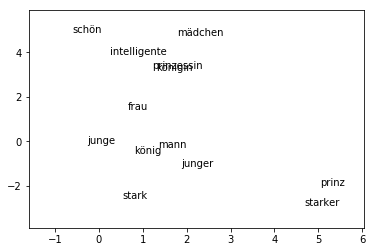

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()